# K-Means Clustering

Rock Boynton | CS 4850 

## Introduction

In this notebook, we will implement and apply the K-Means clustering algorithm to some data, specifically the `gaussguess.csv` dataset.

We will then run the following experiments:

1. Initialization

2. Local Optima

3. Selecting K

## Summary of Results

Implementing KMeans followed nicely from implementing KNN. It was cool to be able to implement a slighlty more complex but much more relevant ML algorithm just using NumPy and SciPy. I feel more comfortable using those tools and working with datasets now as well.

Running the experiments was a great way to see the algorithm in action and how the initial selection of centroids can affect the model. Selecting k especially was a fun experiment because selecting an appropriate `k` value is a real challenge when using these algorithms. It seems it takes some intuition (experience) with the help of some algorithms, plotting, and well-known heuristics (like the "elbow") to select a good `k` value.

For this dataset, `k = 2` or `k = 3` are good to me, with `k = 3` taking the edge due to the plot. However it is important to note that I am only plotting the first two features, and it would be an iteresting experiment to do the same thing with Feature 2 vs 3 or Feature 1 vs 3.

---

## Experiments

Before we begin our experiments, let's import some boilerplate libraries that we will need as well as define some functions for plotting the datpoints with memberships colored and plotting the intra-group variation.

In [41]:
import numpy as np
import matplotlib.pyplot as plt


def plot_data_with_memberships(assignments, k):
    for group in range(k):
        cluster = data[assignments == group]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=group, alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title(f'Data with Memberships (k = {k})')
    plt.show()


def plot_intra_group_variation(trials, scores, iter_k=False):
    plt.scatter(range(trials), scores)
    plt.ylabel('Intra-group variation')  
    if iter_k:
        plt.xlabel('k')
        plt.title(f'Intra-Group Variation v. K')
    else:
        plt.xlabel('Iteration')
        plt.title(f'Intra-Group Variation v. Iteration')
    plt.show()

### Experiment 1: Initialization

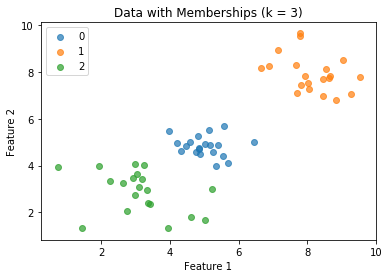

In [42]:
# Step 1: Import our KMeans class
from kmeans import KMeans

# Step 2: Load in the provided data file “gaussguess.csv” and create a 2D Numpy array from it.
datapath = 'gaussguess.csv'
data = np.loadtxt(datapath, delimiter=',')

# Step 3: Run model on the given dataset with parameters `k = 3` and `iterations = 10` and plot first two dimensions
k = 3
iterations = 10
model = KMeans(k, iterations)
assignments = model.fit_predict(data)

plot_data_with_memberships(assignments, model.k)

### Experiment 2: Local Optima

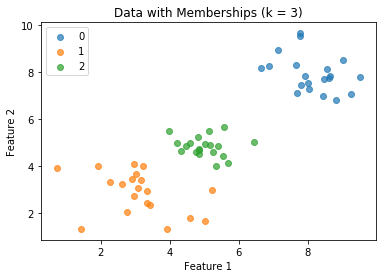

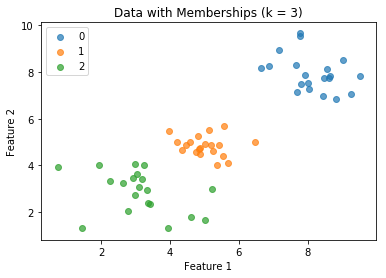

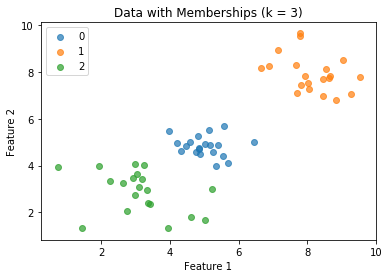

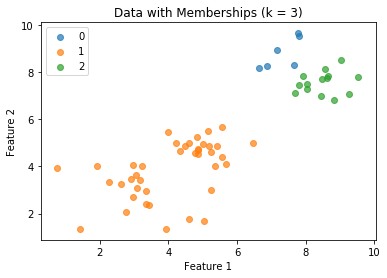

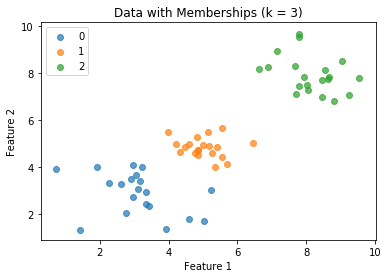

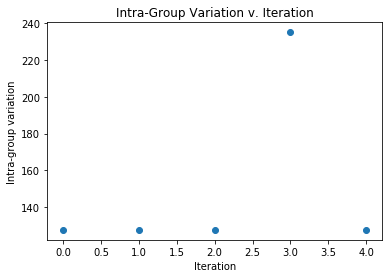

In [43]:
# Step 1: Run KMeans 5 times using `k = 3` and `iterations = 10`, storing the intra-group variation (score) in a NumPy vector. Then plot the datapoints with group membership colored. 
trials = 5
scores = np.zeros(5)
for trial in range(trials):
    model = KMeans(k, iterations)
    assignments = model.fit_predict(data)
    scores[trial] = model.score(data)
    plot_data_with_memberships(assignments, model.k)

# Step 2: Plot each intra-group variation from each evaluation. 
plot_intra_group_variation(trials, scores)

As we can see, intra-group variation is not the same between variations. I don't think we can expect it to be either because the first step of the K-Means algorithm is random selection of initial cluster centers.

### Experiment 3: Selecting K

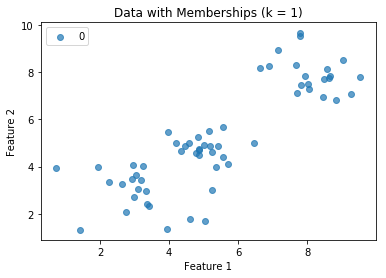

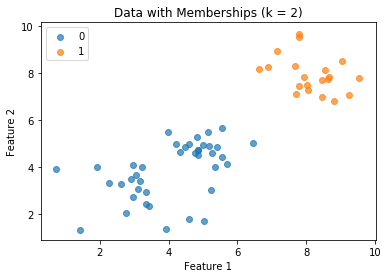

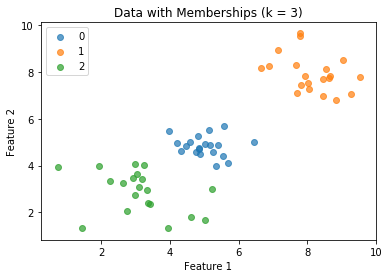

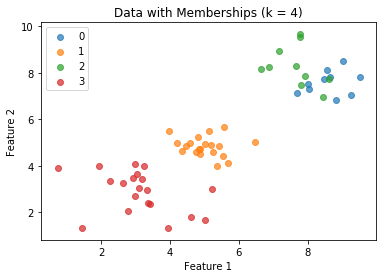

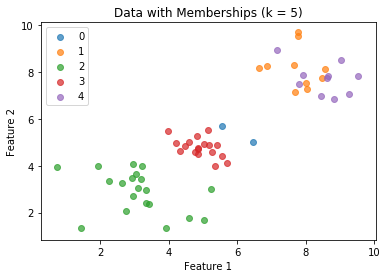

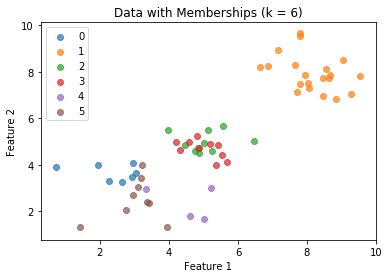

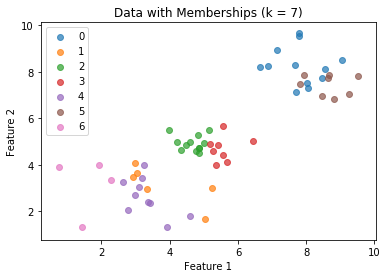

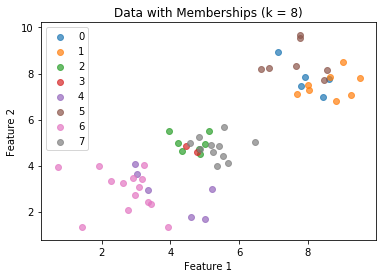

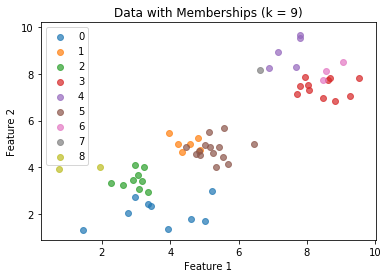

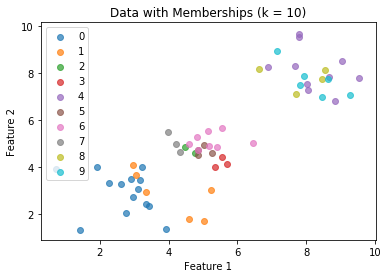

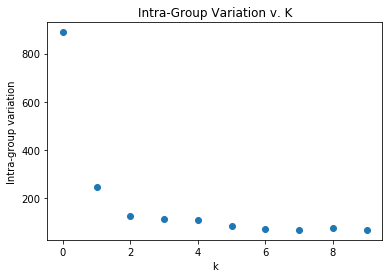

In [44]:
# Step 1: Run KMeans 10 times storing the intra-group variation in a NumPy vector each time and plot the datapoints with group membership colored. 
trials = 10
k = 10
scores = np.zeros(10)
for trial, trial_k in zip(range(trials), range(1, k+1)):
    model = KMeans(trial_k, iterations)
    assignments = model.fit_predict(data)
    scores[trial] = model.score(data)
    plot_data_with_memberships(assignments, model.k)

# Step 2: Plot k vs the within-cluster variance calculated by the score() method. 
plot_intra_group_variation(trials, scores, iter_k=True)

As we can see, as we increase k, the intragroup variation generally decreases, however with diminishing returns. At `k = 2`/`k = 3`, the intragroup variation relatively levels out. 

---

## Questions

a. Based on the plot of k vs the within-cluster variance, what which value of k do you think
is most appropriate?

* I think the value of `k` most appropriate for the model is 2 based on the plot of k vs the within-cluster variance, because it is right about at the "elbow" point where the 2 clusters explain a lot of the variance that was there with lower values of k, but any more than 2 would seem to be marginal reduction of intra-group variation. 

b. Based on your scatter plots, what value of k do you think is most appropriate? Did you
come to the same answer as you did for (a)?

* Intuitively looking at the datapoint scatter plots show that `k = 3` is likely a good choice because there looks to be 3 groupings. This is not the same as (a) where it looked like `k = 2` would be a good choice. `k = 3` is slightly past the elbow.

c. Scikit-Learn's KMeans implementation runs KMeans 10 times by default and picks the
best clustering according to inertia. Why do you think it might do this?

* Running KMeans 10 times and picking the best clustering according to inertia seems like a decent method to get a good value of K, without being able to see the data being plotted, avoiding bad groupings from bad initial centroids. I don't think it would be neccassary to have more than 10 for most datasets.